# Communicate Findings: Ford GoBike 
## by Enovwo Anita Obarakpor

## Introduction
> Ford GoBike is a bike sharing system available in San Fransisco. Similar to other bike share systems, Ford GoBike consists of a fleet of bikes that can be unlocked in one station and returned in any other network station. Thus, this is ideal for one-way trips. These bikes are available for use thorughout the year and riders have access to all bikes in the network.

> The dataset contains information about over 3 million bike trips taken from 2017 t0 2019. Information documented include 
 - Bike Id
 - Start and End Station Id
 - Start and End Station Latitude and Longitude
 - Trip Duration
 - Age
 - Gender
 - Time Details for Trips


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import zipfile
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset
file = zipfile.ZipFile('Clean_FordGoBike_2017_2019.csv.zip')
df = pd.read_csv(file.open('Clean_FordGoBike_2017_2019.csv'))
df.head()

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
0,96,43,37.778768,-122.415929,74,37.776435,-122.426244,2017-12-31 16:57:39.654,0,0,1,1335.2,31,2017,12,52,31,6,16
1,88,96,37.766210,-122.426614,284,37.784872,-122.400876,2017-12-31 15:56:34.842,0,0,0,1313.3,53,2017,12,52,31,6,15
2,3167,247,37.867789,-122.265896,239,37.868813,-122.258764,2017-12-31 14:23:14.001,0,1,0,726.7,21,2017,12,52,31,6,14
3,3539,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-31 23:49:28.422,0,0,0,75.1,27,2017,12,52,31,6,23
4,2311,24,37.789677,-122.390428,67,37.776639,-122.395526,2017-12-31 23:52:55.581,0,1,1,36.4,28,2017,12,52,31,6,23


In [3]:
df.shape

(3023992, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023992 entries, 0 to 3023991
Data columns (total 19 columns):
bike_id                    int64
end_station_id             int64
end_station_latitude       float64
end_station_longitude      float64
start_station_id           int64
start_station_latitude     float64
start_station_longitude    float64
start_time                 object
low_income_trip            int64
subscriber                 int64
gender                     int64
duration_min               float64
user_age                   int64
year                       int64
month                      int64
week                       int64
day                        int64
weekday                    int64
hour                       int64
dtypes: float64(5), int64(13), object(1)
memory usage: 438.4+ MB


##### Note
- start time column is not in datetime format
- id columns should be in int format
- usertype and member gender should be in categorical format
- change day of the week and month to string format in place of integers

In [5]:
df.describe()

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
count,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06,3.023992e+06
mean,2.752008e+03,1.200276e+02,3.776986e+01,-1.223526e+02,1.218380e+02,3.776995e+01,-1.223538e+02,7.865993e-02,8.867352e-01,7.414047e-01,1.291231e+01,3.500416e+01,2.018124e+03,6.197388e+00,2.518090e+01,1.577069e+01,2.575474e+00,1.350416e+01
std,1.733977e+03,1.026967e+02,1.347319e-01,3.202096e-01,1.028572e+02,1.007853e-01,1.360115e-01,2.692073e-01,3.169163e-01,4.378628e-01,3.318015e+01,1.038113e+01,6.392318e-01,3.476132e+00,1.503132e+01,8.761483e+00,1.824127e+00,4.748139e+00
min,1.000000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,2.017000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.353000e+03,3.000000e+01,3.777143e+01,-1.224108e+02,3.500000e+01,3.777106e+01,-1.224117e+02,0.000000e+00,1.000000e+00,0.000000e+00,5.700000e+00,2.800000e+01,2.018000e+03,3.000000e+00,1.200000e+01,8.000000e+00,1.000000e+00,9.000000e+00
50%,2.601000e+03,8.800000e+01,3.778127e+01,-1.223971e+02,8.900000e+01,3.778107e+01,-1.223974e+02,0.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,3.300000e+01,2.018000e+03,6.000000e+00,2.500000e+01,1.600000e+01,2.000000e+00,1.400000e+01
75%,3.858000e+03,1.870000e+02,3.779625e+01,-1.222934e+02,1.890000e+02,3.779581e+01,-1.222914e+02,0.000000e+00,1.000000e+00,1.000000e+00,1.390000e+01,4.000000e+01,2.019000e+03,9.000000e+00,3.900000e+01,2.300000e+01,4.000000e+00,1.700000e+01
max,7.108000e+03,4.200000e+02,3.788022e+01,0.000000e+00,4.200000e+02,3.788022e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.438000e+03,1.410000e+02,2.019000e+03,1.200000e+01,5.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

bike_id                    0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
start_time                 0
low_income_trip            0
subscriber                 0
gender                     0
duration_min               0
user_age                   0
year                       0
month                      0
week                       0
day                        0
weekday                    0
hour                       0
dtype: int64

## Data Cleaning

The dataset is in a pretty clean and tidy state already but for my analysis i would need to make a few changes. First, i will make a copy of the dataset for cleaning

In [8]:
df_c = df.copy()

#### Define

Change datatype of columns to appropriate datatypes

#### Code

In [9]:
# converting start time to datetime format
df_c.start_time = pd.to_datetime(df_c.start_time)

# converting id columns to string format
df_c.bike_id = df_c.bike_id.astype('str')
df_c.end_station_id = df_c.end_station_id.astype('str')
df_c.start_station_id = df_c.start_station_id.astype('str')


#### Test

In [10]:
df_c.dtypes

bike_id                            object
end_station_id                     object
end_station_latitude              float64
end_station_longitude             float64
start_station_id                   object
start_station_latitude            float64
start_station_longitude           float64
start_time                 datetime64[ns]
low_income_trip                     int64
subscriber                          int64
gender                              int64
duration_min                      float64
user_age                            int64
year                                int64
month                               int64
week                                int64
day                                 int64
weekday                             int64
hour                                int64
dtype: object

#### Define

Change gender values to more descriptive names (male and female)

#### Code

In [11]:
df_c['gender'] = df_c['gender'].replace([0,1],['Female','Male'])

#### Test

In [12]:
df_c.gender.value_counts()

Male      2242002
Female     781990
Name: gender, dtype: int64

#### Define

Change month values from number to name format

#### Code

In [13]:
df_c['month']= df_c['month'].apply(lambda x: calendar.month_abbr[x])

#### Test

In [14]:
df_c['month'].value_counts()

Apr    349639
Mar    346702
Oct    286801
Feb    273578
Jan    269085
Sep    260205
Aug    248158
Jul    219604
Nov    214654
Dec    204398
Jun    183792
May    167376
Name: month, dtype: int64

#### Define

Create day of week column to replace integer weekday column from start time

#### Code

In [15]:
df_c['day_of_week'] = df_c['start_time'].dt.day_name()

#### Test

In [16]:
df_c.day_of_week.value_counts()

Tuesday      523945
Thursday     522628
Wednesday    516240
Monday       480219
Friday       476897
Saturday     268063
Sunday       236000
Name: day_of_week, dtype: int64

#### Define

Change subscriber column to a more descriptive name (user type) and change integer values 0 and 1 to 'Customer' and 'Subscriber' respectively.

In [17]:
df_c['subscriber'] = df_c['subscriber'].replace([0,1],['Customer','Subscriber'])
df_c.rename(columns ={'subscriber':'user_type'}, inplace = True)

In [18]:
df_c.user_type.value_counts()

Subscriber    2681480
Customer       342512
Name: user_type, dtype: int64

In [19]:
# checking dataset to see changes reflected
df_c.sample(10)

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,user_type,gender,duration_min,user_age,year,month,week,day,weekday,hour,day_of_week
1024736,1579,209,37.833558,-122.267418,176,37.828410,-122.266315,2018-05-01 19:24:31.817,0,Subscriber,Male,2.6,43,2018,May,18,1,1,19,Tuesday
2617237,5909,400,37.804272,-122.433537,400,37.804272,-122.433537,2019-03-23 16:58:24.485,1,Subscriber,Male,32.4,39,2019,Mar,12,23,5,16,Saturday
1225696,2957,97,37.768265,-122.420110,349,37.781010,-122.405666,2018-07-29 19:15:20.408,0,Subscriber,Male,9.5,26,2018,Jul,30,29,6,19,Sunday
975029,1015,110,37.763708,-122.415204,126,37.761634,-122.390648,2018-05-10 18:13:00.801,0,Customer,Male,15.8,38,2018,May,19,10,3,18,Thursday
862651,1155,194,37.811081,-122.243268,186,37.801319,-122.262642,2018-04-01 09:41:37.831,0,Customer,Female,38.6,28,2018,Apr,13,1,6,9,Sunday
2799132,3476,30,37.776598,-122.395282,20,37.791300,-122.399051,2019-04-30 16:39:28.042,0,Subscriber,Male,9.5,28,2019,Apr,18,30,1,16,Tuesday
2295022,5005,30,37.776598,-122.395282,15,37.795392,-122.394203,2019-01-17 17:38:31.250,0,Subscriber,Female,9.6,26,2019,Jan,3,17,3,17,Thursday
2107217,5017,11,37.797280,-122.398436,323,37.798014,-122.405950,2018-12-19 12:19:25.918,0,Subscriber,Male,3.5,49,2018,Dec,51,19,2,12,Wednesday
3018450,6831,30,37.776598,-122.395282,25,37.787522,-122.397405,2019-04-01 16:55:39.842,0,Subscriber,Male,7.0,47,2019,Apr,14,1,0,16,Monday
1192629,1771,30,37.776598,-122.395282,17,37.792251,-122.397086,2018-06-04 17:05:33.936,0,Subscriber,Male,10.6,52,2018,Jun,23,4,0,17,Monday


In [20]:
df_c.dtypes

bike_id                            object
end_station_id                     object
end_station_latitude              float64
end_station_longitude             float64
start_station_id                   object
start_station_latitude            float64
start_station_longitude           float64
start_time                 datetime64[ns]
low_income_trip                     int64
user_type                          object
gender                             object
duration_min                      float64
user_age                            int64
year                                int64
month                              object
week                                int64
day                                 int64
weekday                             int64
hour                                int64
day_of_week                        object
dtype: object

In [21]:
df_c.to_csv('Ford-BikeGo-master.csv')

In [22]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023992 entries, 0 to 3023991
Data columns (total 20 columns):
bike_id                    object
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_time                 datetime64[ns]
low_income_trip            int64
user_type                  object
gender                     object
duration_min               float64
user_age                   int64
year                       int64
month                      object
week                       int64
day                        int64
weekday                    int64
hour                       int64
day_of_week                object
dtypes: datetime64[ns](1), float64(5), int64(7), object(7)
memory usage: 461.4+ MB


### What is the structure of your dataset?

The dataset has 3023992 bike share trips that took place within the San Francisco Bay Area. The attributes recorded are 
- bike id, start and end station id as strings
- start and end station latitude and longitudes as floats
- user status(subscriber or just a customer)
- gender of the user
- trip start time and duration
- income level of the trip
- the specific time in terms of hour, day of the week , month and year, the trips were taken.

### What is/are the main feature(s) of interest in your dataset?

I am interested in dicsovering the types of people that patronize the bike share service the most and what factors contribute the most to the success of the service which will be measured in terms of how many trips are taken at different times and the conditions at those times.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that I think will most support my investigation into user demographic are the age, gender and status of the customers and for the most ideal conditions for trips, i will expect to find insights from the month, day of the week and time of the day.


In [23]:
df_c = pd.read_csv('Ford-BikeGo-master.csv')
# converting start time to datetime format
df_c.start_time = pd.to_datetime(df_c.start_time)

# converting id columns to string format
df_c.bike_id = df_c.bike_id.astype('str')
df_c.end_station_id = df_c.end_station_id.astype('str')
df_c.start_station_id = df_c.start_station_id.astype('str')


## Univariate Exploration


In [24]:
# setting base color for plots that need only one color
unicolor = sb.color_palette()[0]

I will start by looking at the distribution of gender and user type


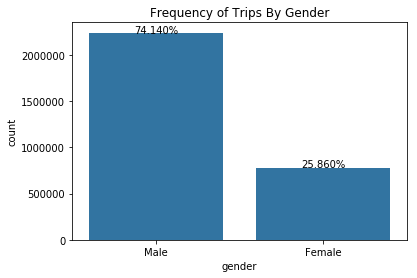

In [25]:
ax = sb.countplot(data = df_c, x ='gender', color = unicolor)
total = len(df_c)
for bar in ax.patches:
    percentage = '{:.3f}%'.format(100 * bar.get_height()/total)
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Frequency of Trips By Gender');

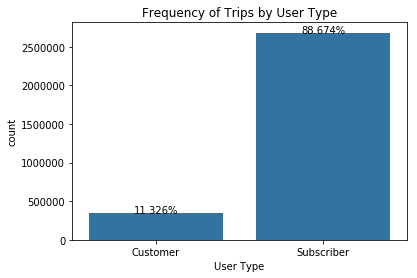

In [26]:
ax = sb.countplot(data = df_c, x ='user_type', color = unicolor)
total = len(df_c)
for bar in ax.patches:
    percentage = '{:.3f}%'.format(100 * bar.get_height()/total)
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Frequency of Trips by User Type')
plt.xlabel('User Type');

There are a lot more male than female riders (74% to 26%) and most of the people that use the service are already subscribed to it. Subscribers make up over 88% of all users.

Now, I would look to look at the age demographic of riders.

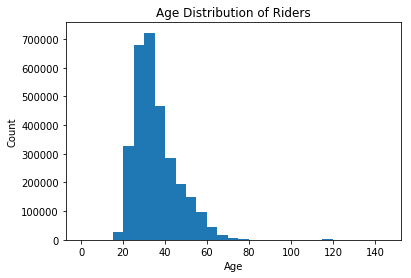

In [27]:
bin = np.arange(0, df_c['user_age'].max()+5,5)
plt.hist(data= df_c, x ='user_age',bins = bin)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Riders');

Most riders seem to fall between the age range of 20 and 40. However, there seems to be at least one outlier
above 100 which is unrealistic and should be explored further.

In [28]:
print(df_c.user_age.describe())
df_c.user_age.value_counts()

count    3.023992e+06
mean     3.500416e+01
std      1.038113e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.410000e+02
Name: user_age, dtype: float64


30     168925
31     154388
29     149941
28     141171
32     139261
33     136505
27     133184
25     126941
26     126637
34     122968
35     116784
24     109012
36     105491
37      88748
23      84272
38      82446
39      71832
40      65511
41      61171
22      56921
42      54457
43      54447
44      49093
45      43513
21      42856
47      41211
46      40543
50      37509
49      36199
48      34526
        ...  
116       173
84        138
78        136
94        134
86        107
98         91
80         77
93         66
79         54
123        35
89         30
99         25
130        23
90         20
104        18
81         15
92         13
106        12
114        12
91          9
141         7
110         7
96          6
109         5
137         5
129         3
112         2
108         2
131         2
133         1
Name: user_age, Length: 100, dtype: int64

There are a lot more entries with user ages above 60 than I expected even though 75% of riders are below 40. Rather then remove what i consider to be outliers. i will create a categorical column for age ranges and put the ages in bins so that all ages above 60 are put in one category

In [29]:
# creating age group field from bins of ages
df_c['age_group'] = df_c['user_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                          else '20 - 30' if 20<x<=30
                                          else '30 - 40' if 30<x<=40
                                          else '40 - 50' if 40<x<=50
                                          else '50 - 60' if 50<x<=60
                                          else 'over 60' )

In [30]:
# making age_group and ordinal categorical variable
ages = ['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60','over 60']
age_classes = pd.api.types.CategoricalDtype(ordered=True, categories=ages)
df_c['age_group'] = df_c['age_group'].astype(age_classes)

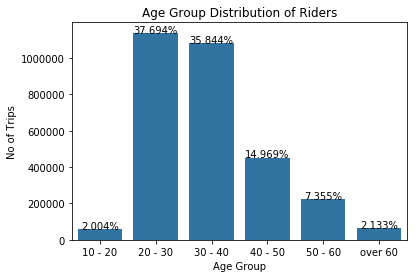

In [31]:
ax = sb.countplot(data = df_c, x = 'age_group', color = unicolor)
total = len(df_c)
for bar in ax.patches:
    percentage = '{:.3f}%'.format(100 * bar.get_height()/total)
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Age Group Distribution of Riders')
plt.xlabel('Age Group')
plt.ylabel('No of Trips');

It is more obvious now that most users fall between 20 and 40 years.

I would like to know what the distribution of rides is across the months of the year. For a fairer analysis, i will limit my dataset to just one year (2018) so that there is only one month's worth of trips for each month.


In [32]:
df_18 = df_c[df_c['year']== 2018]

In [33]:
# confirming that there's data for every month
df_18.month.nunique()

12

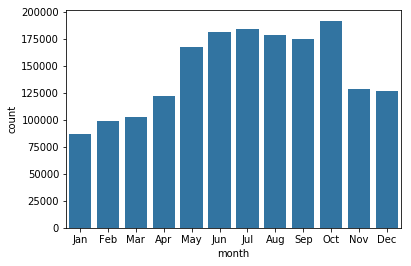

In [34]:
sb.countplot(data = df_18, x ='month', color = unicolor);

It looks like summer and early fall months had the most no of trips in 2018 with winter months having the least.

#### What is the distribution of the duration of bike rides?

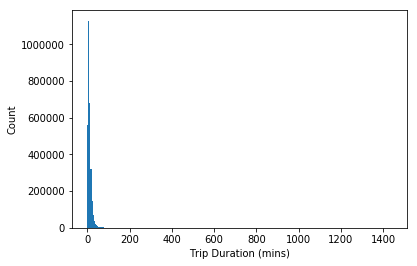

In [35]:
bin = np.arange(0, df_c['duration_min'].max()+5,5)
plt.hist(data= df_c, x ='duration_min',bins = bin)
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Count');

It seems there are outliers in this data that distort the distribution or perhaps the trend does not follow a normal progression. Let us try this on a different scale

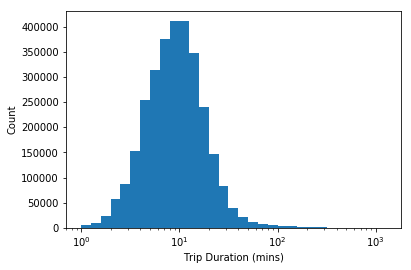

In [36]:
bin = 10** np.arange(0, np.log10(df_c['duration_min'].max()), 0.1)
plt.hist(data= df_c, x ='duration_min',bins = bin)
plt.xscale('log')
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Count');

Almost all trips last less than 100minutes. Some trips seem to extend to more than 1000 minutes which is quite interesting for a bike trip and warrants a bit more exploration

In [37]:
df_c.duration_min.describe()

count    3.023992e+06
mean     1.291231e+01
std      3.318015e+01
min      1.000000e+00
25%      5.700000e+00
50%      9.000000e+00
75%      1.390000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

The average duration in mins is about 13 minutes but the maximum duration is about 1438 minutes which confirms the presence of outliers.

In [38]:
df_c.duration_min.describe(percentiles = [0.90])

count    3.023992e+06
mean     1.291231e+01
std      3.318015e+01
min      1.000000e+00
50%      9.000000e+00
90%      2.080000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

90% of trips last less than 20 minutes. Considering that there are fixed start and end start stations and thus somewhat fixed distances, I am curious to see why some trips took more than 1000 minutes or if the data might just be inaccurate in those cases. To explore this i will use the latitude and longitudes of the start and end station to calcuate the distance between them.

In [39]:
import math

In [40]:
# Create new fields for distance
def distance(start, end):
    startlat, startlon = start
    endlat, endlon = end
    radius = 6371

    distanceLat = math.radians(endlat - startlat)
    distanceLon = math.radians(endlon - startlon)
    x = (math.sin(distanceLat / 2) * math.sin(distanceLat / 2) +
         math.cos(math.radians(startlat)) * math.cos(math.radians(endlat)) *
         math.sin(distanceLon / 2) * math.sin(distanceLon / 2))
    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))
    dist = radius * y

    return dist
	
df_c['estimated_distance'] = df_c.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [41]:
df_c.sample(10)

,Unnamed: 0,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,...,user_age,year,month,week,day,weekday,hour,day_of_week,age_group,estimated_distance
1261669,1261669,2331,53,37.775946,-122.437777,53,37.775946,-122.437777,2018-07-23 19:47:31.032,0,...,25,2018,Jul,30,23,0,19,Monday,20 - 30,0.000000
1719749,1719749,118,211,37.827757,-122.256716,175,37.835946,-122.262366,2018-09-06 18:47:40.830,0,...,33,2018,Sep,36,6,3,18,Thursday,30 - 40,1.036949
2616578,2616578,3269,249,37.858473,-122.253253,267,37.861804,-122.253569,2019-03-23 18:46:33.347,1,...,22,2019,Mar,12,23,5,18,Saturday,20 - 30,0.371371
428524,428524,2215,20,37.791300,-122.399051,58,37.776619,-122.417385,2017-07-23 04:47:19.498,0,...,27,2017,Jul,29,23,6,4,Sunday,20 - 30,2.293656
2284268,2284268,4761,139,37.751017,-122.411901,99,37.767037,-122.415443,2019-01-19 13:12:02.790,0,...,35,2019,Jan,3,19,5,13,Saturday,30 - 40,1.808368
1342078,1342078,1428,100,37.767100,-122.410662,78,37.773717,-122.411647,2018-07-10 21:29:59.951,0,...,28,2018,Jul,28,10,1,21,Tuesday,20 - 30,0.740828
1191426,1191426,1556,214,37.823321,-122.275732,230,37.810743,-122.291415,2018-06-04 18:22:25.958,0,...,26,2018,Jun,23,4,0,18,Monday,20 - 30,1.963143
1008694,1008694,1794,122,37.760299,-122.418892,118,37.759177,-122.436943,2018-05-04 13:42:38.387,0,...,26,2018,May,18,4,4,13,Friday,20 - 30,1.591754
1627928,1627928,4437,98,37.765052,-122.421866,43,37.778768,-122.415929,2018-09-21 14:54:35.523,0,...,35,2018,Sep,38,21,4,14,Friday,30 - 40,1.611917
2342978,2342978,2769,112,37.763847,-122.413004,110,37.763708,-122.415204,2019-01-08 17:14:44.391,0,...,29,2019,Jan,2,8,1,17,Tuesday,20 - 30,0.194055


In [42]:
df_c.estimated_distance.describe()

count    3.023992e+06
mean     1.711321e+00
std      3.208503e+01
min      0.000000e+00
25%      8.880234e-01
50%      1.402716e+00
75%      2.129829e+00
max      1.279835e+04
Name: estimated_distance, dtype: float64

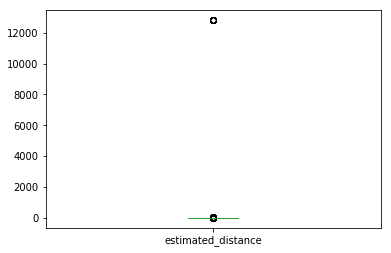

In [43]:
df_c.estimated_distance.plot(kind ='box')

In [44]:
long_dist = df_c.query('estimated_distance > 10')
long_dist

,Unnamed: 0,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,...,user_age,year,month,week,day,weekday,hour,day_of_week,age_group,estimated_distance
112188,112188,1230,4,37.785881,-122.408915,209,37.833558,-122.267418,2017-11-17 15:22:53.773,0,...,48,2017,Nov,46,17,4,15,Friday,40 - 50,13.513738
167158,167158,1210,312,37.329732,-121.901782,195,37.812314,-122.260779,2017-10-31 07:57:18.251,0,...,41,2017,Oct,44,31,1,7,Tuesday,40 - 50,62.293682
173964,173964,450,209,37.833558,-122.267418,41,37.781270,-122.418740,2017-10-28 15:07:37.864,0,...,48,2017,Oct,43,28,5,15,Saturday,40 - 50,14.509783
174509,174509,1050,15,37.795392,-122.394203,183,37.808702,-122.269927,2017-10-28 08:48:53.981,0,...,39,2017,Oct,43,28,5,8,Saturday,30 - 40,11.018580
174907,174907,1356,16,37.794130,-122.394430,183,37.808702,-122.269927,2017-10-28 08:40:40.892,0,...,35,2017,Oct,43,28,5,8,Saturday,30 - 40,11.058126
174933,174933,652,41,37.781270,-122.418740,209,37.833558,-122.267418,2017-10-28 08:26:11.382,0,...,48,2017,Oct,43,28,5,8,Saturday,40 - 50,14.509783
176170,176170,2123,178,37.819381,-122.261928,81,37.775880,-122.393170,2017-10-27 16:20:31.340,0,...,34,2017,Oct,43,27,4,16,Friday,30 - 40,12.504857
228274,228274,2961,22,37.789756,-122.394643,185,37.801858,-122.265368,2017-10-11 07:56:36.340,0,...,32,2017,Oct,41,11,2,7,Wednesday,30 - 40,11.438366
236041,236041,3027,197,37.808848,-122.249680,71,37.773063,-122.439078,2017-10-08 13:36:26.861,0,...,34,2017,Oct,40,8,6,13,Sunday,30 - 40,17.111834
245717,245717,1581,284,37.784872,-122.400876,221,37.794353,-122.253875,2017-10-05 07:14:14.303,0,...,34,2017,Oct,40,5,3,7,Thursday,30 - 40,12.960469


In [45]:
long_trips = df_c[df_c['duration_min']>= 1000]

In [46]:
long_trips[['duration_min', 'start_time','estimated_distance']]

,duration_min,start_time,estimated_distance
0,1335.2,2017-12-31 16:57:39.654,0.942931
1,1313.3,2017-12-31 15:56:34.842,3.069727
717,1236.7,2017-12-30 15:32:40.256,0.000000
719,1297.0,2017-12-30 14:30:43.823,3.968977
759,1008.7,2017-12-30 18:52:23.937,0.976725
4490,1060.4,2017-12-27 19:12:42.794,2.172670
5903,1372.0,2017-12-26 15:11:36.362,0.000000
6020,1357.3,2017-12-26 14:16:57.952,1.079030
8780,1109.4,2017-12-23 15:40:51.759,0.898458
9469,1121.2,2017-12-22 16:59:30.317,0.834257


In [47]:
long_trips[['duration_min', 'start_time','estimated_distance']].describe()

,duration_min,estimated_distance
count,1034.000000,1034.000000
mean,1193.659188,1.672164
std,125.556014,1.354812
min,1000.000000,0.000000
25%,1082.825000,0.762360
50%,1181.800000,1.433010
75%,1292.250000,2.338552
max,1438.000000,14.426843


While there are also some erroneous distances which consitute outliers, looking at the statistics of the distances covered on these trips that took so long, they are not different from the typical distance covered on much shorter trips. I assume that the long times recorded on these trips are from users forgetting to log out after completing a trip which causes the timer to keep counting. It could also be a system error on the part of the service provider.

I also couldnt help but notice that the minium distance travelled was 0. I will not investigate this further but i speculate that this might be due to riders starting a trip and changing their minds without taking the ride or again, it could be a system error.

I will keep these entries in my data set for now because the other columns seem to contain accurate information. However, i may drop these columns if these data points might skew any result i seek.

### What is the most popular day and time of day for rides?

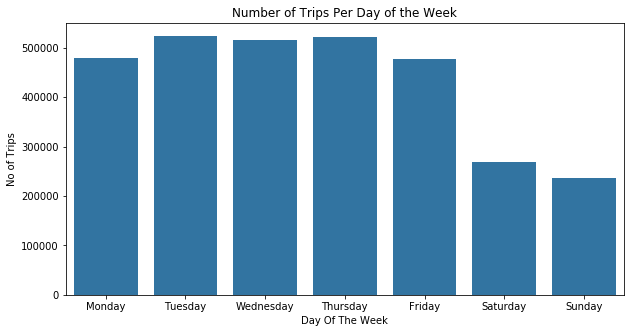

In [48]:
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize =[10,5])
sb.countplot(data = df_c, x ='day_of_week', color = unicolor, order = week)
plt.xlabel('Day Of The Week')
plt.ylabel('No of Trips')
plt.title('Number of Trips Per Day of the Week');

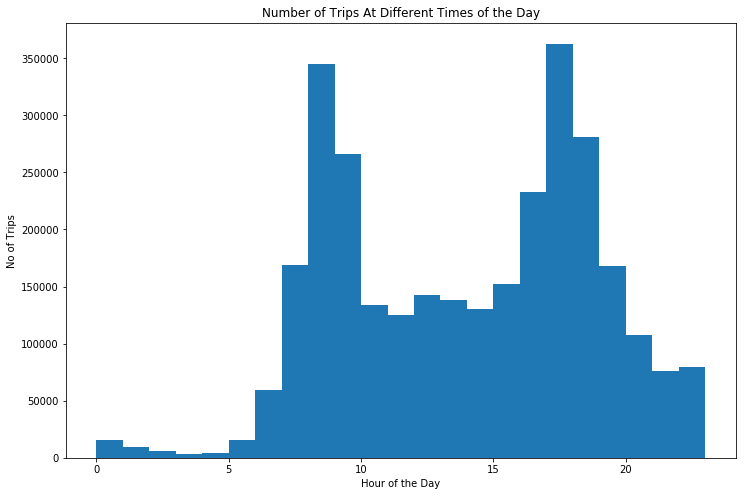

In [49]:
plt.figure(figsize =[12,8])
bin = np.arange(0,df_c['hour'].max()+1,1)
plt.hist(data = df_c, x= 'hour', bins = bin)
plt.title('Number of Trips At Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('No of Trips');

From the two plots above, it looks like more rides are taken on weekdays (monday to Friday) with less taken on the weekends. 

Also, there are two peaks between 7 and 10 in the morning and 4 and 7 in the evening. This coincides with the typical commute of a 9 to 5 job or a student which leads me to believe that most trips are taken by workers to and from their places of work/school. 

I will explore this idea further by checking the trend during the weekdays versus the weekends when most people do not go to work.

# Findings So Far

The age and gender distribution are not surprising as i expected young adult males to be the most frequent patrons of a bike service. There were some unrealistic ages(above 100) which were unexpected. Rather than speculate on the reason for this or drop these entries from the dataset, I chose to create a categorical column for ages which featured increasing age ranges in 10s with all ages above 60 in one category.

Weekdays seeing more frequent rides than the weekend was suprising because I had assumed that the service would be used more for lesiure and recreational activities over the weekend. However, it seems it is most frequently used for work and/or school commutes.

Some odd data points are present for trip duration which i attribute to errors in logging in and out either on the part of the customers or the service provider. I will not do anything to these for now unless I see a need.


## Bivariate Exploration


Firstly, i would like to explore the frequency of rides at different times of the day on weekdays verus weekends

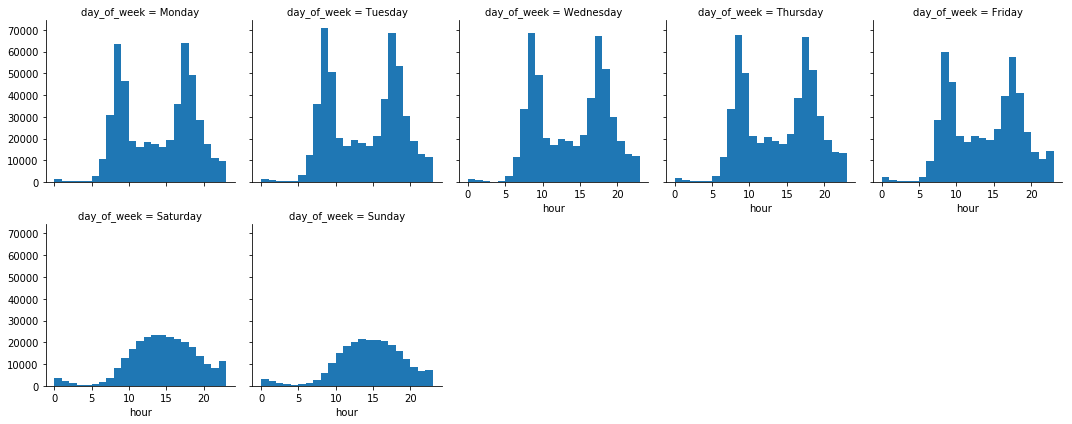

In [50]:
bin = np.arange(0,df_c['hour'].max()+1,1)
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# i am making a faceted histogram for the different days of the week and setting col_wrap to 5 to separate the weekdays from the weekend
g = sb.FacetGrid(data = df_c, col = 'day_of_week', col_wrap = 5, col_order = week)
g.map(plt.hist, 'hour', bins =bin);

The week days have an almost identical bimodal distribution with peaks from 7am to 9am and 4 to 6pm. This supports the theory that weekday trips are mostly work/school commutes.
Saturday and Sunday on the other have a more even distribution with most rides falling anywhere from 10 to 7 with a peak in the early afternoon.

Now lets look at the relationship between the day of the week and user type.

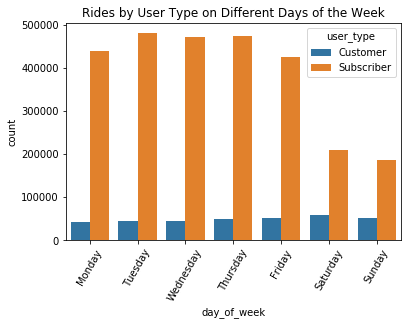

In [51]:
sb.countplot(data = df_c, x ='day_of_week', hue ='user_type', order = week)
plt.xticks(rotation=60)
plt.title('Rides by User Type on Different Days of the Week');

It looks like on any given day, more rides are taken by subscribers than customers without a subscription. However, it looks while subscribers take fewer trips on the weekends, other customers take more trips. I will study this trend better with a different kind of plot.

In [52]:
df_user_week = df_c.groupby(['day_of_week','user_type']).size().reset_index()
df_user_week

,day_of_week,user_type,0
0,Friday,Customer,52421
1,Friday,Subscriber,424476
2,Monday,Customer,42120
3,Monday,Subscriber,438099
4,Saturday,Customer,59264
5,Saturday,Subscriber,208799
6,Sunday,Customer,51104
7,Sunday,Subscriber,184896
8,Thursday,Customer,48610
9,Thursday,Subscriber,474018


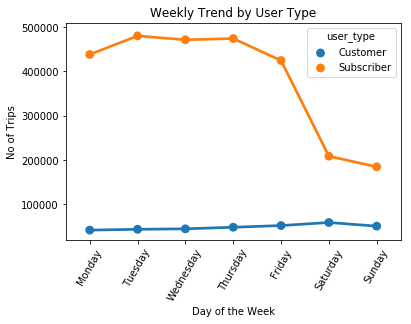

In [53]:
sb.pointplot(data = df_user_week, x ='day_of_week', y=0, hue ='user_type', order = week)
plt.title('Weekly Trend by User Type')
plt.xlabel('Day of the Week')
plt.ylabel('No of Trips')
plt.xticks(rotation = 60);

It becomes more apparent that subscriber trips decrease sharply at the weekend which could mean that the people that are most likely to subscribe are those that use the service for work commutes.
On the other hand, there is a slight increase in usage at the weekend for customers who do not have subscriptions. This leads me to believe that the people who use the service more recreationally or casually are less likely to get an active subscription than those who use it to get to and from work.

I would also like to see what the monthly trend is for the user types. I will use a year's worth of data once again for a more even distribution since our dataset does not cover three full years.

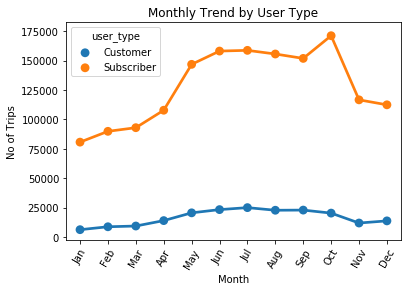

In [54]:
df_user_month = df_18.groupby(['month','user_type']).size().reset_index()
year = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sb.pointplot(data = df_user_month, x ='month', y=0, hue ='user_type', order = year)
plt.title('Monthly Trend by User Type')
plt.xlabel('Month')
plt.ylabel('No of Trips')
plt.xticks(rotation = 60);

There was a bit of an upward trend in the summer months of 2018 (with a peak in july) for customers which is not as apparent for subscribers, who booked the most trips in October. The trend for customers supports my ideas that most customers without an active subscription are people use the service for leisure. More busy summer months is most likely an indication of the presence of more tourists in the area.

I also want to see which demographic of people takes longer trips

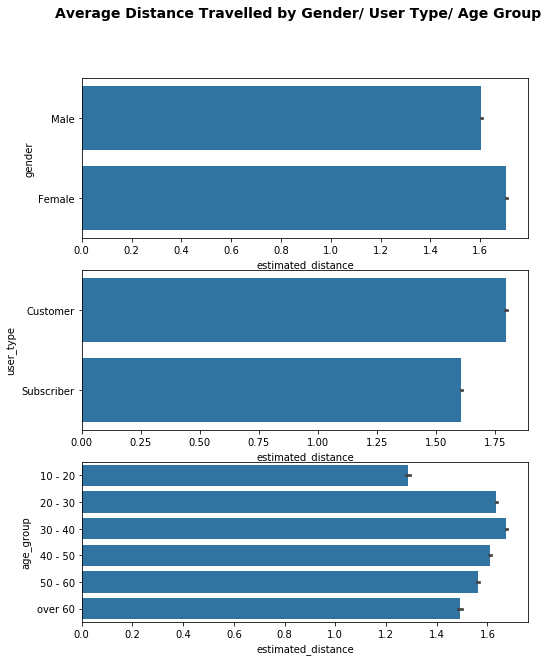

In [55]:
#filtering out outliers for estimated distance that might skew my findings
df_dist = df_c.query('estimated_distance < 10')

#plotting graphs of distance against gender, age group and user type
fig, ax = plt.subplots(nrows=3, figsize = [8,10])

sb.barplot(data = df_dist, y = 'gender', x = 'estimated_distance', color = unicolor, ax = ax[0])
sb.barplot(data = df_dist, y = 'user_type', x = 'estimated_distance', color = unicolor, ax = ax[1])
sb.barplot(data = df_dist, y = 'age_group', x = 'estimated_distance', color = unicolor, ax = ax[2])

fig.suptitle('Average Distance Travelled by Gender/ User Type/ Age Group', fontsize=14, fontweight='bold');

Surprisingly, females take longer trips than males on average. 
Customers also take longer trips than subscribers which leads me to believe that leisure rides tend to be longer than the average work/school commute. 
The longest distances were covered by people within the ages of 20 and 40 which makes sense because I expect them to be in the best physical shape and hence, be more likely to ride longer.

Lastly, I want to see if subscription to the service has increased over time. For this i will look at the relation between user type and time and compare the trend in customers vs subscribers.

In [56]:
# creating a field for year and month for a monthly time series analysis
df_c['year-month'] = pd.to_datetime(df_c['start_time']).dt.to_period('M')

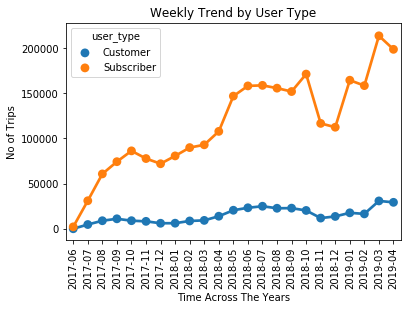

In [57]:
df_user_year_month = df_c.groupby(['year-month','user_type']).size().reset_index()
sb.pointplot(data = df_user_year_month, x ='year-month', y=0, hue ='user_type')
plt.title('Weekly Trend by User Type')
plt.xlabel('Time Across The Years')
plt.ylabel('No of Trips')
plt.xticks(rotation = 90);

It looks like there has been a sharper increase in the number of trips by subscribers compared to mere customers which indicates that the service has become more popular from when it was first established with more people subscribing to it. However, there was a sharp decrease in rides by subscribers in November and December of 2018. I don't think this can be attributed to a drop in subscribers because there is also a drop in rides by non-subscribers. There must be some other reason why the service was substantially less busy at that time. I will confirm this by looking at at the trend for all rides.

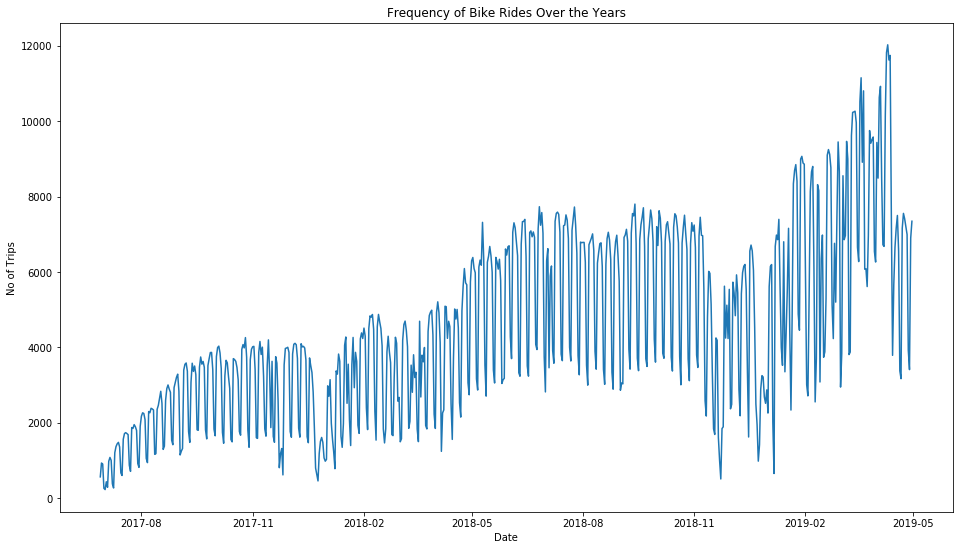

In [58]:
df_c['start_date'] = df_c['start_time'].dt.date
df_c.groupby('start_date').agg({'bike_id':'count'}).plot(style='-',figsize = (16,9), legend = False)
plt.title('Frequency of Bike Rides Over the Years')
plt.xlabel('Date')
plt.ylabel('No of Trips');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> In general, the frequency of rides has a postive correlation with time which indicates that the service has grown over the years and can be considered to be successful.

> Users who have subsriptions take more trips during the week and at hours of the day that correspond to a work or school commute. On the other hand, non-subscribed customers take more trips at the weekend which indicates that they are more for leisure.

> In terms of distance covered on these rides, surpsingly, females seem to take longer tips than males. Customers take longer trips than subscribers and the age of people that take the longest trips is between 20 and 40. The shortest trips on average are taken by the youngest and the oldest users.


## Multivariate Exploration

In this section, I want to study the relationship between the usertype and the ages and length of trips to see if there is a correlation between age and subscription. I will also do the same for different genders.

In [59]:
# creating a data subset to remove outlier ages from estimated distance subset
df_age = df_dist.query('user_age <=70')

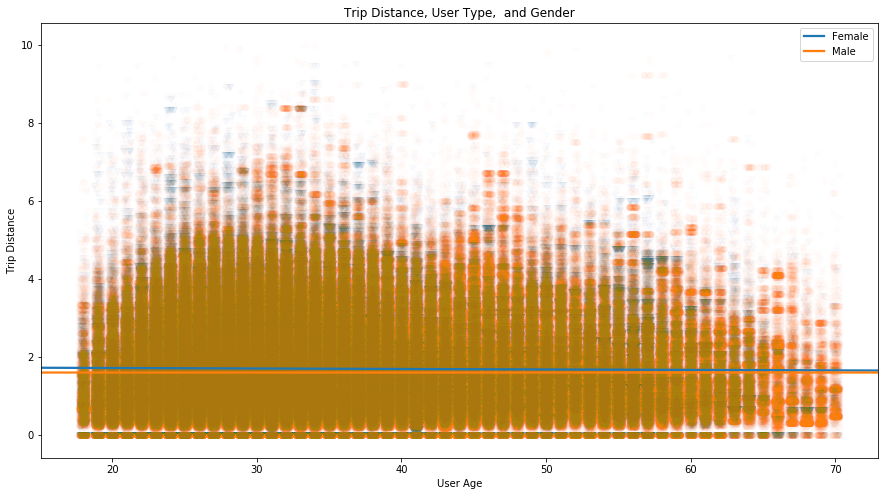

In [60]:
plt.figure(figsize=[15,8])
genders = [['Female', 'v'],['Male', 'o']]

for gender, marker in genders:
    df_gender = df_age[df_age['gender'] == gender]
    sb.regplot(data = df_gender, x = 'user_age', y = 'estimated_distance', marker = marker, scatter_kws={'alpha':0.01}, x_jitter =0.3)
plt.legend(['Female','Male'])
plt.title('Trip Distance, User Type,  and Gender')
plt.xlabel('User Age')
plt.ylabel('Trip Distance');


> It looks like ages are distributed pretty evenly among both genders but due to the large number of entries , the markers are bleeding into one another and it is hard to differentiate between female and male. 
To better visualize this i can either plot a sample subset of the data or make faceted plots for male and female. I will plot both to see which conveys this relationship better.

Text(0.5,0.98,'Distance Covered on Trips By Gender and Age')

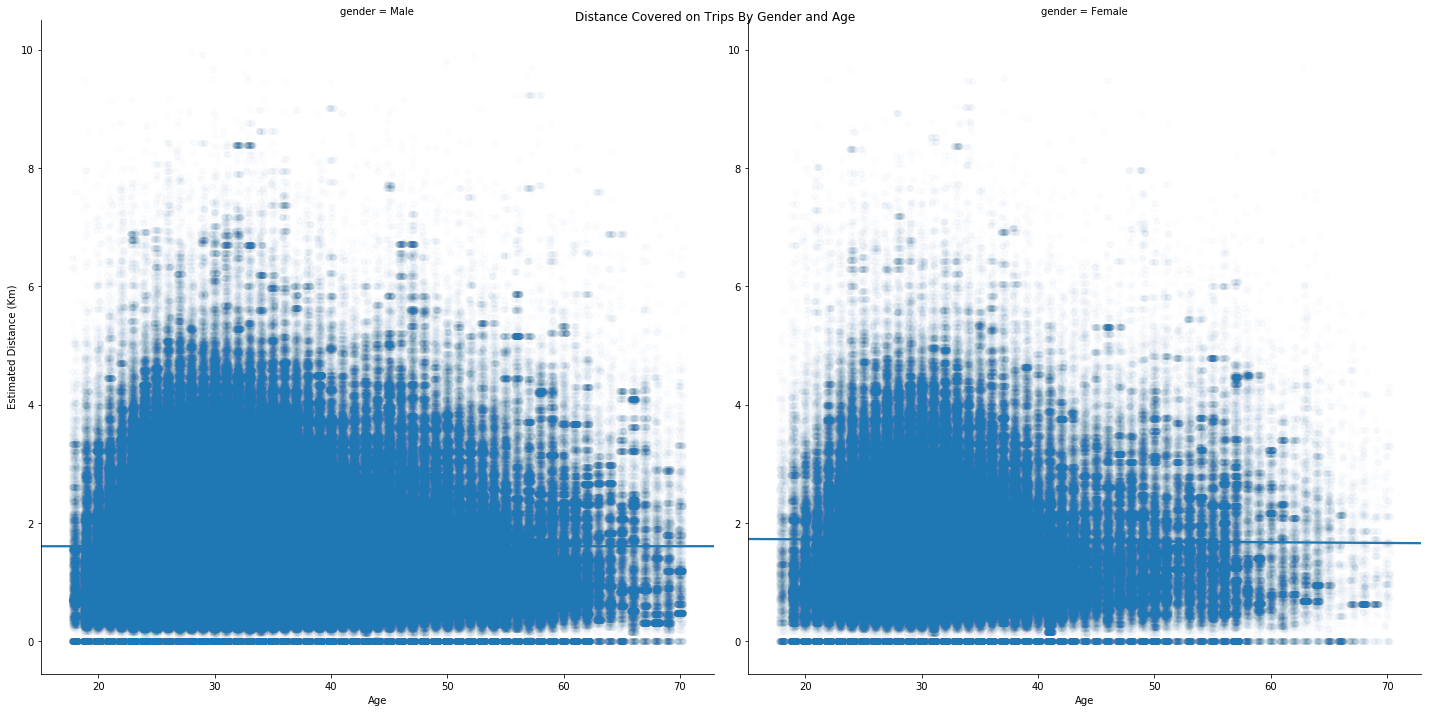

In [61]:
g = sb.FacetGrid(data= df_age, col = 'gender', size = 10)
g.map(sb.regplot, 'user_age', 'estimated_distance', x_jitter = 0.3, scatter_kws={'alpha':0.01})
g.set_xlabels('Age')
g.set_ylabels(' Estimated Distance (Km)')
g.fig.suptitle('Distance Covered on Trips By Gender and Age')

In [62]:
df_sample = df_age.sample(10000)

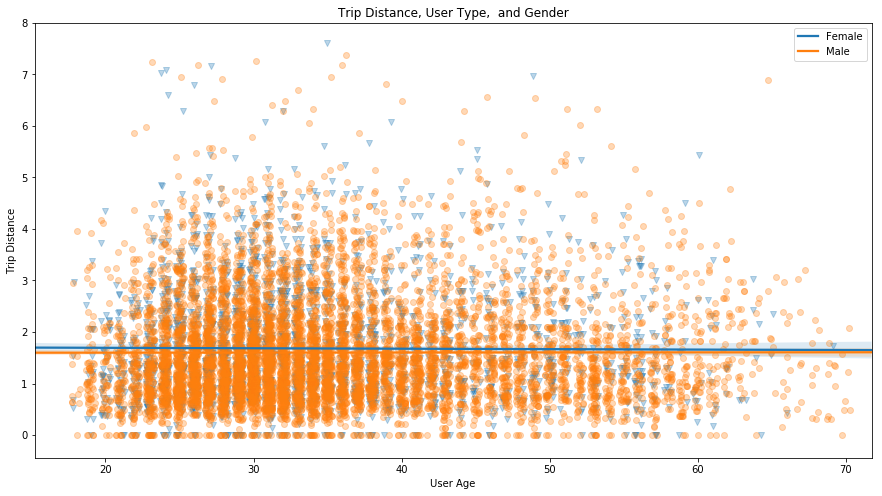

In [63]:
plt.figure(figsize=[15,8])
genders = [['Female', 'v'],['Male', 'o']]

for gender, marker in genders:
    df_gender = df_sample[df_sample['gender'] == gender]
    sb.regplot(data = df_gender, x = 'user_age', y = 'estimated_distance', marker = marker, scatter_kws={'alpha':0.3}, x_jitter =0.3)
plt.legend(['Female','Male'])
plt.title('Trip Distance, User Type,  and Gender')
plt.xlabel('User Age')
plt.ylabel('Trip Distance');


> The same relationship exits between the ages and the gender for both genders. There is no strong correlation between them. However, the population is most dense between 20 and 40 years of age.
Again, the same relationship exists between the ages and distance of rides for both genders. There is no obvious. However, the position of the regression shows that the average trip distance for females is slighlty higher than that for males.

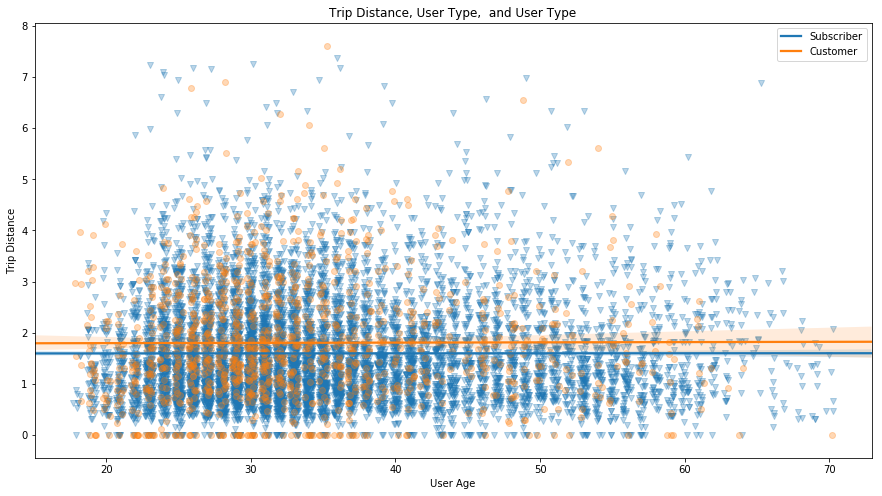

In [64]:
plt.figure(figsize=[15,8])
usertype = [['Subscriber', 'v'],['Customer', 'o']]

for user, marker in usertype:
    df_user = df_sample[df_sample['user_type'] == user]
    sb.regplot(data = df_user, x = 'user_age', y = 'estimated_distance', marker = marker, scatter_kws={'alpha':0.3}, x_jitter =0.3)
plt.legend(['Subscriber','Customer'])
plt.title('Trip Distance, User Type,  and User Type')
plt.xlabel('User Age')
plt.ylabel('Trip Distance');


> There is no linear correlaration between age and user type or age and trip distance. However, from the regression line, we can see that the average trip distance is slightly longer for customers than subscribers

Now i would like to see how the timing of the trip affects frequency for both subscribers and customers

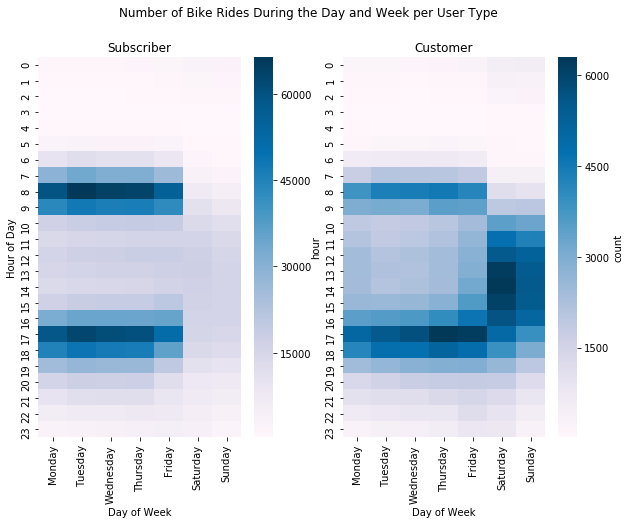

In [65]:
plt.figure(figsize=(10,7))
df_c['day_of_week'] = pd.Categorical(df_c['day_of_week'], 
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

# left plot: subscriber
plt.subplot(1, 2, 1)
sub_rides = df_c.query('user_type == "Subscriber"').groupby(['day_of_week','hour']).size().astype(int)
sub_rides = sub_rides.reset_index(name = 'count') 
sub_rides = sub_rides.pivot(index = 'hour', columns = 'day_of_week', 
                                      values = 'count')
ax1 = sb.heatmap(sub_rides, cmap ='PuBu') 
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Subscriber')

# right plot: customer
plt.subplot(1, 2, 2)
cust_rides = df_c.query('user_type == "Customer"').groupby(['day_of_week','hour']).size().astype(int)
cust_rides = cust_rides.reset_index(name = 'count') 
cust_rides = cust_rides.pivot(index = 'hour', columns = 'day_of_week', 
                                      values = 'count')
ax2 = sb.heatmap(cust_rides, cmap ='PuBu', cbar_kws = {'label' : 'count'}) 
plt.xlabel('Day of Week')
plt.title('Customer')
plt.ylim(ax1.get_ylim())

plt.suptitle('Number of Bike Rides During the Day and Week per User Type');   

From the heat map, I can see that subcribers have twin peaks between 7 and 9am in the morning and 4 and 6pm in the evening but not much activities during the weekend which confirms my theory of a work/school commute.
Customers, on the other hand, take more rides at the weekend which confirms that non-subcribers most likely take these rides for leisure.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There was no strong correlation between the age of all users of both genders and subscription and the distance covered on their trips. This is a bit surprising to me because i expected to see a stronger non-linear relationship (parabolic) where users between the ages of 20 and 40 take much longer trips. However, there was only a very slight curve.

> There is a strong relationship between the day of the week and time of the day and the number of rides taken by subscribers vs customers. The plots show that subscribers mostly use the service for work or school commutes from monday to friday while customers used the service more frequently on weekends.



## Conclusions
> From my analyis, I can see that the service is very popular during the week for work/school commutes and these group of people mostly have active subcriptions since they are by far the most frequent riders. The service is also popular on the weekends for leisure and tourists as shown by the subtle spike during summer months. 
> There is no relationship between user age and subcription or gender which means that all sorts of people of different ages and gender subscribe to the service. Active subscription is not strongly associated with any demographic of users.

> In Conclusion, this ia a service that appeals to all sorts of people from different works of life. It is used both for work and school commutes on weekdays and for more general uses and leisure on the weekends. However, weekday users are by far the larger percentage of subscribers. More leisure users could perhaps be enticed or encouraged to subscribe for the service with appropriate marketing.

In [66]:
# saving dataframe to a csv file for the slide deck visualisations
df_c.to_csv('Bike-Go-Slides.csv')

#### Reference
- [Haversine Formula](https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points)
- [Ford GoBike Dataset](https://www.kaggle.com/datasets/victorinoeng/fordgobike20172019)